In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.axis('off')

#!cp /cellar/users/btsui/Downloads/Thesaurus.txt . 

###

objective: map the srs freetext to NCIT

copied from 
https://evs.nci.nih.gov/ftp1/NCI_Thesaurus/ReadMe.txt: 


" 
If a "parents", "synonyms", "display name", or "concept status" field contains multiple entries, these are pipe-delimited.
For root concepts without "parents", this field contains the string "root_node".  The
first entry in the "synonyms" field is the preferred name of the concept.  If no preferred
name has been stated for the concept, this field contains the concept name.  The "definition"
field contains only one definition if more than one definition is associated with the concept;
not all concepts contain definitions.  A "display_name" or "concept status" may contain zero values.
The "semantic type" field is guaranteed to contain one or more values.
"


First in synonym is the official name used on the NCIT website. 

Thesaurus.txt is pulled from  https://evs.nci.nih.gov/ftp1/NCI_Thesaurus/ReadMe.txt

In [2]:
import pandas as pd
import seaborn as sns
sns.set_style('white')


In [3]:
ncitT=pd.read_csv('Thesaurus.txt',sep='\t',header=None)

In [6]:
#ncitT['4']

In [7]:
#ncitT

In [8]:
col=['code',
 'concept name',
 'parents',
 'synonyms',
 'definition',
 'display name',
 'concept status',
 'semantic type']
ncitT.columns=col

In [11]:
#ncitT['display name']

###

is any of the code re

In [12]:
ignoreConceptStatus=['Retired_Concept', 'Obsolete_Concept', 'Header_Concept',
       'Provisional_Concept', 'Header_Concept|Retired_Concept',
       'Header_Concept|Obsolete_Concept']
m_concept=~ncitT['concept status'].isin(ignoreConceptStatus)
m=m_concept
ncitSubDf=ncitT[m]

In [13]:
myIndexOrder=['code','concept name','parents','definition','semantic type']
ncitSubDf_dedup=ncitSubDf#.drop_duplicates(myIndexOrder)
tmpS=ncitSubDf_dedup.set_index(myIndexOrder)['synonyms']

In [28]:
#ncitSubDf_dedup

In [14]:
#131549
#ncitSubDf_dedup

In [15]:
tmpS2=tmpS.str.split('|',expand=True).stack()

In [16]:
tmpDf=tmpS2.to_frame()

In [17]:
tmpDf.index.names=myIndexOrder+['n_th synonym']

In [18]:
tmpDf.columns=['synonyms']

In [35]:
tmpDf['synonyms'].str.split(' ',expand=False).values

array([list(['Percutaneous', 'Coronary', 'Intervention', 'for', 'ST', 'Elevation', 'Myocardial', 'Infarction-Stable-Over', '12', 'Hours', 'From', 'Symptom', 'Onset']),
       list(['PERCUTANEOUS', 'CORONARY', 'INTERVENTION', '(PCI)', 'FOR', 'ST', 'ELEVATION', 'MYOCARDIAL', 'INFARCTION', '(STEMI)', '(STABLE,', '>12', 'HRS', 'FROM', 'SYMPTOM', 'ONSET)']),
       list(['Percutaneous', 'Coronary', 'Intervention', 'for', 'ST', 'Elevation', 'Myocardial', 'Infarction-Stable', 'After', 'Successful', 'Full-Dose', 'Thrombolytic', 'Therapy']),
       ..., list(['Retired', 'Concept', '2009']),
       list(['Retired', 'Concept', '2010']),
       list(['Retired', 'Concept', '2011'])], dtype=object)

In [14]:
tmpDf.to_pickle('./Data/NCIT_table.pickle')

In [41]:
#tmpDf

## scratch

In [27]:
tmpDf[tmpDf.synonyms=='Order']

,,,,,,synonyms
code,concept name,parents,definition,semantic type,n_th synonym,
C42680,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C42680>,C20189,A logical or comprehensible arrangement of separate elements; a condition of regular or proper arrangement.,Spatial Concept,0,Order
C45287,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C45287>,C40098,A taxonomic category between Class and Family. It is group of organisms that although differing quite a bit among themselves still have a large degree of characteristics in common.,Conceptual Entity,0,Order
C48906,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C48906>,C25404,"The act of requesting that a person, business, or organization supply something in return for payment.",Activity,0,Order
C54092,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C54092>,C19498,A commercial document used to request someone to supply something in return for payment and providing specifications and quantities.,Intellectual Product,0,Order
C64219,<http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#C64219>,C53228,"A set of elements are rearranged or reindexed in various and different orders. In the rearrangement process, none of the elements are lost, added, or changed.",Qualitative Concept,2,Order


In [25]:
ncitSubDf['semantic type'].value_counts().head(n=50)

Finding                                                    18508
Intellectual Product                                       14978
Gene or Genome                                             11276
Neoplastic Process                                         11012
Pharmacologic Substance                                    10298
Disease or Syndrome                                         4969
Amino Acid, Peptide, or Protein                             3726
Geographic Area                                             3716
Quantitative Concept                                        3319
Laboratory Procedure                                        2845
Cell or Molecular Dysfunction                               1903
Organic Chemical|Pharmacologic Substance                    1889
Functional Concept                                          1879
Anatomical Structure                                        1871
Therapeutic or Preventive Procedure                         1868
Qualitative Concept      

median len of synonyms: 20.0


Text(0.5,0,'synonym length')

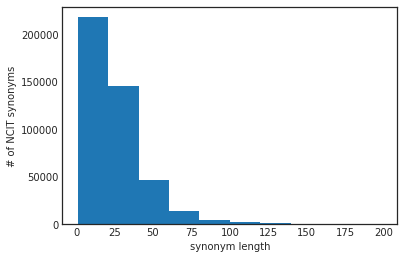

In [109]:
ax=tmpDf['synonyms'].str.len()[tmpDf['synonyms'].str.len()<200].hist()
print ("median len of synonyms:",tmpDf['synonyms'].str.len().median())
ax.set_ylabel('# of NCIT synonyms')
ax.grid(False)

ax.set_xlabel('synonym length')

In [17]:
tmpDfSub1=tmpDf.groupby(level=['code','n_th synonym']).first()

In [27]:
tmpDfSub1

In [23]:
tmpDf['synonyms'].str.count(' ').quantile(0.95)

7.0